# Initial Boundary Value Problem (IBVP) Solver
This file contains 3 IBVP solvers for corresponding Partial Differential Equations. (PDE)


## Forward Time Centered Difference Scheme
The scheme is used to solve IBVP with 1D diffusion equation.
$$v_t=v_{xx}, x\in(0,1)$$
$$v(0,t)=v(1,t)=0 \text{ Boundary Conditions}$$
$$v(x,0)=sin(3\pi x) \text{ Initial Condition}$$
This solver is used to approximate the value of $v(x,t)$ at given time $t$.
For your information the exact solution of this PDE is
$$v(x,t)=e^{-9\pi^2t}sin(3\pi x)$$

In [18]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
def v(x,t):
    return np.exp(-9*np.pi**2*t)*np.sin(3*np.pi*x)
def FTCS(n,t,mode):
    dx = 1/(n-1)
    dt = dx**2/2
    if mode:
        dt = dx**2/6
    time = 0
    
    u = np.zeros(n)
    for i in  range(0,n):
        u[i] = np.sin(3*np.pi*dx*i)
    while time<t:
        if time+dt>t:
            dt = t-time
        unew = np.zeros(n)
        for i in range(1,n-1):
            unew[i]=u[i]+(dt/dx**2)*(u[i+1]-2*u[i]+u[i-1])
        time+=dt
        u = unew
    return u

exact1 = v(np.linspace(0,1,32),0.02)
exact2 = v(np.linspace(0,1,64),0.02)
exact3 = v(np.linspace(0,1,128),0.02)
exact4 = v(np.linspace(0,1,256),0.02)

solutions1 = FTCS(32,0.02,False)
err2d1 = np.linalg.norm(solutions1-exact1)
#print(solutions1)
print(err2d1)

solutions2 = FTCS(64,0.02,False)
err2d2 = np.linalg.norm(solutions2-exact2)
#print(solutions2)
print(err2d2)

solutions3 = FTCS(128,0.02,False)
err2d3 = np.linalg.norm(solutions3-exact3)
#print(solutions3)
print(err2d3)

solutions4 = FTCS(256,0.02,False)
err2d4 = np.linalg.norm(solutions4-exact4)
#print(solutions4)
print(err2d4)

print()
print("---dt^2/6---")

solutions5 = FTCS(32,0.02,True)
err2d5 = np.linalg.norm(solutions5-exact1)
#print(solutions5)
print(err2d5)

solutions6 = FTCS(64,0.02,True)
err2d6 = np.linalg.norm(solutions6-exact2)
#print(solutions6)
print(err2d6)

solutions7 = FTCS(128,0.02,True)
err2d7 = np.linalg.norm(solutions7-exact3)
#print(solutions7)
print(err2d7)

solutions8 = FTCS(256,0.02,True)
err2d8 = np.linalg.norm(solutions8-exact4)
#print(solutions8)
print(err2d8)
print()
print(solutions4[254])
print(v(254/255,0.02))

print(solutions4[128])
print(v(128/255,0.02))

0.018260430824777064
0.006299508248134241
0.002199653550624639
0.0007729861581560023

---dt^2/6---
3.605231891125252e-05
2.89940565804225e-06
2.764044790349723e-07
1.1731967868403413e-08

0.006250570996587897
0.006253100578168617
-0.16912720235350504
-0.16919564746933483


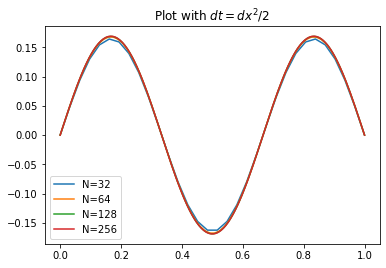

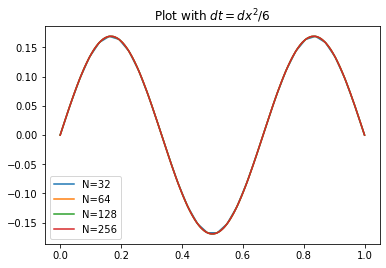

In [19]:
plt.plot(np.linspace(0,1,32),solutions1,label="N=32")
plt.plot(np.linspace(0,1,64),solutions2,label="N=64")
plt.plot(np.linspace(0,1,128),solutions3,label="N=128")
plt.plot(np.linspace(0,1,256),solutions4,label="N=256")
plt.title("Plot with $dt={{dx}^2/2}$")
plt.legend()
plt.show()

plt.plot(np.linspace(0,1,32),solutions5,label="N=32")
plt.plot(np.linspace(0,1,64),solutions6,label="N=64")
plt.plot(np.linspace(0,1,128),solutions7,label="N=128")
plt.plot(np.linspace(0,1,256),solutions8,label="N=256")
plt.title("Plot with $dt={{dx}^2/6}$")
plt.legend()
plt.show()


## Lax-Wendroff Scheme
The scheme is used to solve linear advection equation which is given as 
$$v_t+v_x=0$$
The domain of the function is given as $x\in[-5,5]$.
To show the behavior of the approximation, the boundary condition is given as periodic boundary conditions with two sets of initial conditions.
$$ v(x,0)=cos^2(\pi(x-1)) \text{ if } -0.5\leq x\leq 0.5 $$
$$ v(x,0)=1 \text{ if } -0.5\leq x\leq 0.5 $$


In [20]:
def LW(n,t,cond):
    dx = 10/(n-1)
    dt = 0.75*dx
    time = 0
    u = np.zeros(n)
    if cond==1:
        for i in range(0,n):
            tmp = -5+i*dx
            if tmp>=-0.5 and tmp<=0.5:
                u[i]=(np.cos(np.pi*(tmp-1)))**2
                #u[i]=np.exp(-tmp**2)
    else:
        for i in range(0,n):
            tmp = -5+i*dx
            if tmp>=-0.5 and tmp<=0.5:
                u[i]=1
    while time<t:
        if time+dt>t:
            dt = t-time
        unew = np.zeros(n)
        for i in range(1,n-1):
            unew[i]=u[i]-(0.5*dt/dx)*(u[i+1]-u[i-1])+(0.5*dt**2/dx**2)*(u[i+1]-2*u[i]+u[i-1])
        unew[0]=u[0]-(0.5*dt/dx)*(u[1]-u[n-2])+(0.5*dt**2/dx**2)*(u[1]-2*u[0]+u[n-2])
        unew[n-1]=u[0]
        time+=dt
        u = unew
    return u

def f(x,t):
    arr=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<=0.5:
            arr[i] = (np.cos(np.pi*(x[i]-t-1)))**2
    return arr

def g(x,t):
    arr=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<=0.5:
            arr[i] = 1
    return arr


0.03513995642406243
0.010325261526430483

0.007350261273565005
0.0015407718674541491



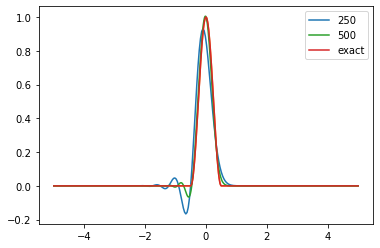

0.09523077444901401
0.026990917686630766

0.08041441216500561
0.01585071222214396



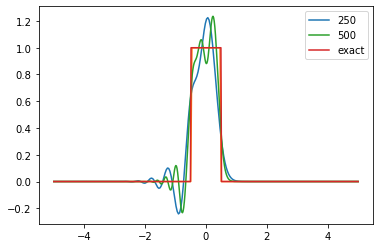

In [21]:
res1=LW(250,20,1)

print(LA.norm((res1-f(np.linspace(-5,5,250),20))/24.9,2))
print(LA.norm((res1-f(np.linspace(-5,5,250),20))/24.9,np.inf))
print()
x=np.linspace(-5,5,250)
plt.plot(x,res1,label="250")
plt.plot(x,f(x,20))
x=np.linspace(-5,5,500)
res1=LW(500,20,1)

print(LA.norm((res1-f(np.linspace(-5,5,500),20))/49.9,2))
print(LA.norm((res1-f(np.linspace(-5,5,500),20))/49.9,np.inf))
print()
plt.plot(x,res1,label="500")
plt.plot(x,f(x,20),label="exact")
plt.legend()
plt.savefig("res1.jpg")
plt.show()

res1=LW(250,20,2)

print(LA.norm((res1-f(np.linspace(-5,5,250),20))/24.9,2))
print(LA.norm((res1-f(np.linspace(-5,5,250),20))/24.9,np.inf))
print()
x=np.linspace(-5,5,250)
plt.plot(x,res1,label="250")
plt.plot(x,g(x,20))
x=np.linspace(-5,5,500)
res1=LW(500,20,2)

print(LA.norm((res1-f(np.linspace(-5,5,500),20))/49.9,2))
print(LA.norm((res1-f(np.linspace(-5,5,500),20))/49.9,np.inf))
print()
plt.plot(x,res1,label="500")
plt.plot(x,g(x,20),label="exact")
plt.legend()
plt.savefig("res2.jpg")
plt.show()

## Upwind Flux Limiter Scheme
This scheme is to solve the same problem with the Lax-Wendroff scheme with remedy to oscillatory behavior near the discontinuities. To dramatically show the effect of the scheme I used initial condition with 3 discontinuities.
$$v(x,0)=1 \text{ if } x<-1$$
$$v(x,0)=-1 \text{ if } -1\leq x<1$$
$$v(x,0)=0 \text{ otherwise } $$

In [24]:
def fl(t,cond):
    n=600
    dx = 10/(n-1)
    dt = 0.75*dx
    R=dt/dx
    time = 0
    u = np.zeros(n)
    for i in range(0,n):
        tmp =i*dx-5
        if tmp<-1:
            u[i]=0
        elif tmp>=-1 and tmp<0:
            u[i]=1
        elif tmp>=0 and tmp<1:
            u[i]=-1
        else:
            u[i]=0
    while time<t:
        if time+dt>t:
            dt = t-time
        unew = np.zeros(n)
        theta= np.zeros(n)
        for i in range(1,n-1):
            theta[i]=(u[i]-u[i-1])/(u[i+1]-u[i]+1e-10)
        theta[0]=(u[0]-u[n-2])/(u[1]-u[0]+1e-10)
        theta[n-1]=theta[0]
        phi=np.zeros(n)
        if cond==1:
            for i in range(0,n):
                phi[i]=max(0,min(1,2*theta[i]),min(theta[i],2))
        elif cond==2:
            for i in range(0,n):
                phi[i]=(abs(theta[i])+theta[i])/(abs(theta[i])+1)
        else:
            for i in range(0,n):
                phi[i]=min(theta[i],1)
        for i in range(1,n-1):
            unew[i]=u[i]-(R-0.5*R*(1-R)*phi[i-1])*(u[i]-u[i-1])-(0.5*phi[i]*R*(1-R)*(u[i+1]-u[i]))
        unew[0]=u[0]-(R-0.5*R*(1-R)*phi[n-2])*(u[0]-u[n-2])-(0.5*phi[0]*R*(1-R)*(u[1]-u[0]))
        unew[n-1]=unew[0]
        time+=dt
        u = unew
    return u
def f(x,t):
    res=[]
    for i in range (0,len(x)):
        cur=x[i]
        tmp=t%10
        if cur<=tmp-1:
            res.append(0)
        elif cur>=tmp-1 and cur<tmp:
            res.append(1)
        elif cur>=tmp and cur<tmp+1:
            res.append(-1)
        else:
            res.append(0)
    return res

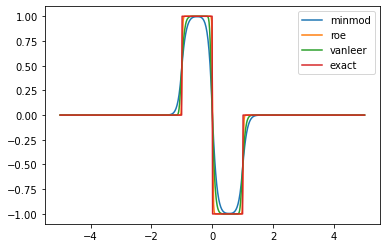

In [25]:
x=np.linspace(-5,5,600)
minmod=fl(50,3)
roe=fl(50,1)
vanleer=fl(50,2)
plt.plot(x,minmod,label="minmod")
plt.plot(x,roe,label="roe")
plt.plot(x,vanleer,label="vanleer")
plt.plot(x,f(x,50),label="exact")
plt.legend()
plt.savefig("res3.jpg")
plt.show()